# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
# http://api.openweathermap.org/data/2.5/weather?q={city name}&appid={weather_api_key}

# small list of cities to test
cities = ["sydney","nairobi","severo-kurilsk","nvl_test","darhan","hillsborough","atlanta","cairo"]

base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    "appid": weather_api_key,
    "units": "imperial"
}

city_counter = 1
set_counter = 1
set_size = 50
found_city_id = 0

weather_columns=["City_ID" ,"City", "Cloudiness", "Country" ,"Date", "Humidity", "Lat" ,"Lng", "Max Temp","Wind Speed"]
weather_rows = []

print("Beginning Data Retrieval")
print("------------------------------")
for city in cities:
    params['q'] = city
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    response = requests.get(base_url, params=params).json()
    
    try:
        weather_row = [found_city_id, city, response["clouds"]["all"], response["sys"]["country"], response["dt"], response["main"]["humidity"], response["coord"]["lat"], response["coord"]["lon"], response["main"]["temp_max"], response["wind"]["speed"]]
        weather_rows.append(weather_row)
        found_city_id += 1
    except:
        print("City not found. Skipping...")

    city_counter += 1
    if city_counter > set_size:
        city_counter = 1
        set_counter += 1

weather_df = pd.DataFrame(weather_rows, columns=weather_columns)


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | sydney
Processing Record 2 of Set 1 | nairobi
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | nvl_test
City not found. Skipping...
Processing Record 5 of Set 1 | darhan
Processing Record 6 of Set 1 | hillsborough
Processing Record 7 of Set 1 | atlanta
Processing Record 8 of Set 1 | cairo


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
weather_df.to_csv(output_data_file, index=False, header=True)

weather_df.drop(columns="City_ID",inplace=True)
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sydney,0,AU,1586105521,76,-33.87,151.21,61.00,6.93
1,nairobi,40,KE,1586105730,56,-1.28,36.82,73.40,11.41
2,severo-kurilsk,18,RU,1586105149,88,50.68,156.12,29.53,6.02
3,darhan,100,MN,1586105149,58,49.49,105.92,31.91,8.90
4,hillsborough,90,US,1586105150,87,37.57,-122.38,55.40,13.87
5,atlanta,90,US,1586104989,56,33.75,-84.39,78.01,3.36
6,cairo,4,EG,1586105272,44,30.06,31.25,75.20,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

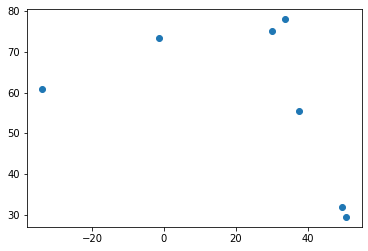

In [37]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"])
plt.show()

#### Latitude vs. Humidity Plot

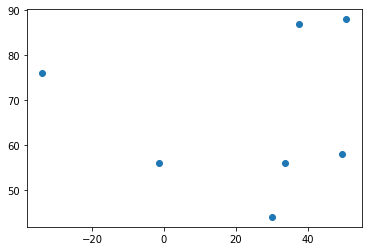

In [38]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"])
plt.show()

#### Latitude vs. Cloudiness Plot

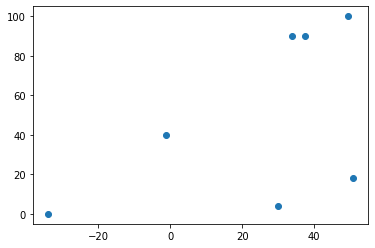

In [39]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"])
plt.show()

#### Latitude vs. Wind Speed Plot

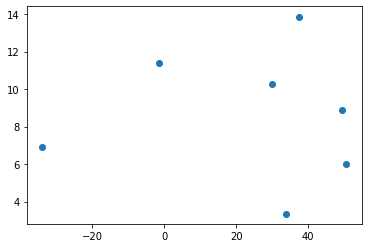

In [40]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"])
plt.show()

## Linear Regression

In [41]:
# OPTIONAL: Create a function to create Linear Regression plots
def get_regression_data(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(40,60),fontsize=15,color="red")
    plt.xlabel('Lat')
    plt.ylabel('Y')
    plt.show()


In [42]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_df = weather_df.loc[weather_df["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

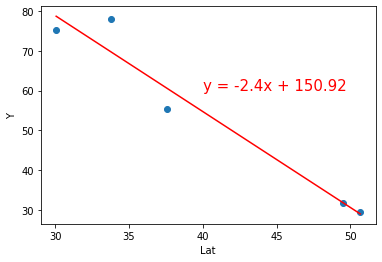

In [43]:
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

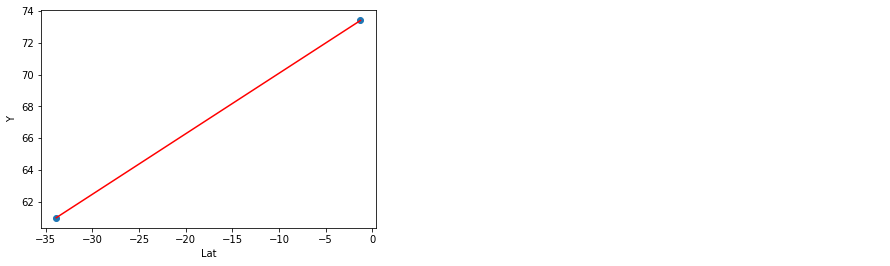

In [44]:
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

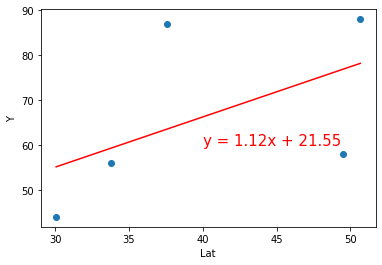

In [45]:
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

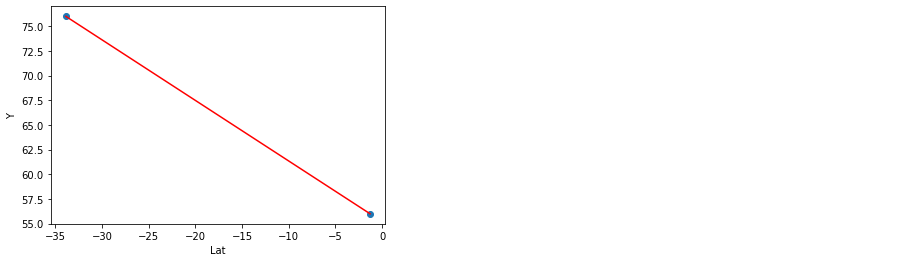

In [46]:
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

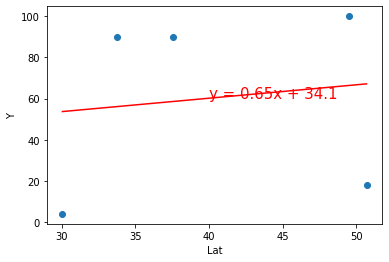

In [47]:
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

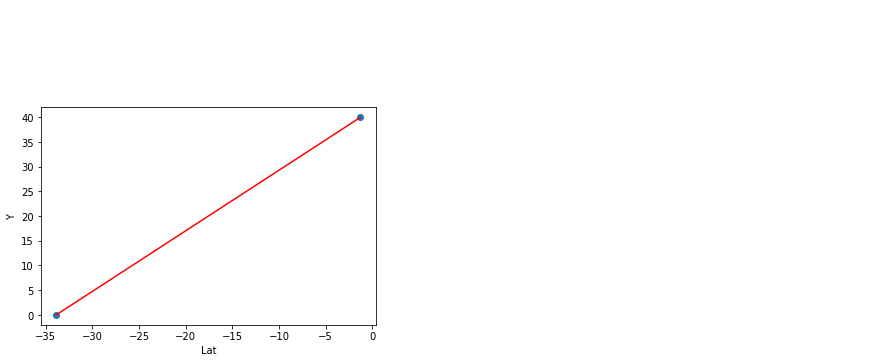

In [48]:
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

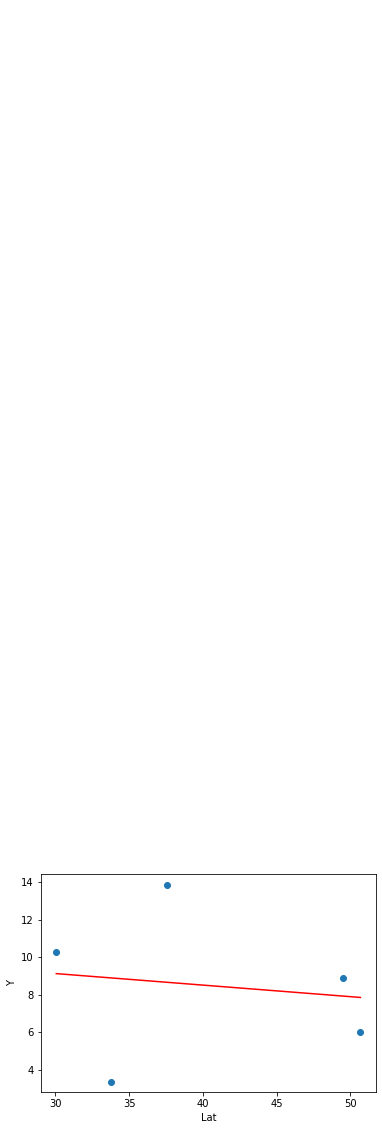

In [49]:
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

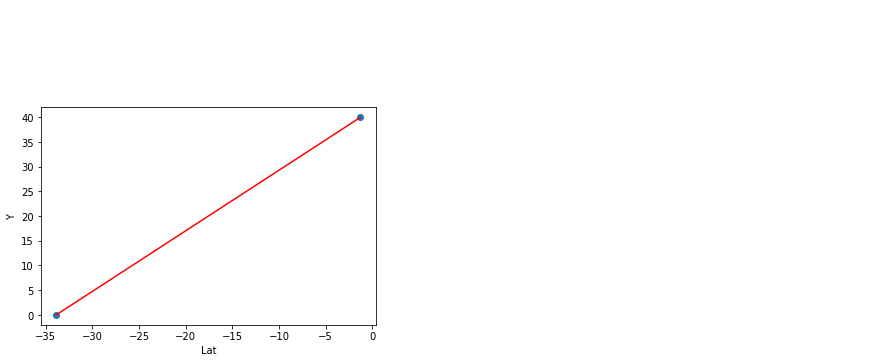

In [50]:
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"])